## Gaussian Mixture Model Applied to Old Faithful Data

#### with some help from geeksforgeeks.org https://www.geeksforgeeks.org/gaussian-mixture-model/

In [1]:
# Dependencies and setup
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.cluster import KMeans

In [2]:
# Import data
data= pd.read_csv('truncated_waittimes.csv', index_col='eruptionID')
data = data.dropna(how='any')
data.count()

geyser                 18627
eruption_time_epoch    18627
duration               18627
observer               18627
date                   18627
year                   18627
waiting_min            18627
waiting_hr             18627
dur                    18627
dtype: int64

In [ ]:
# Create figure
fig = go.Figure(data=go.Scatter(x=data['waiting_min'],y=data['dur'], marker=dict(
        size=10,
        cmax=2020,
        cmin=1970,
        line=dict(color='DarkSlateGrey', width=0.5),
        color=data['year'],
        colorbar=dict(title="Colorbar Year"),
        colorscale="Portland"),
        mode="markers")) 

fig.update_xaxes(title= 'Waiting Time (minutes)')
fig.update_yaxes(title= 'Duration of Eruption (minutes)')
fig.update_yaxes(range=[0, 6])
fig.update_xaxes(range=[0, 150])
fig.update_layout(title= 'Waiting time vs. Duration 1970-2019')
fig.show()

In [3]:
# Drop irrelevant columns
data.drop(['geyser', 'eruption_time_epoch', 'observer', 'duration', 'date', 'waiting_hr', 'year'], inplace=True, axis=1, errors='ignore')
data.reset_index(drop=True)
data.head()

,waiting_min,dur
eruptionID,,
23132,71.0,4.00
23133,50.0,1.50
23134,67.0,4.25
23135,81.0,4.00
23136,43.0,1.75


In [4]:
data_ed = data.loc[(data['waiting_min'] <120) & (data['dur'] < 8)]

In [5]:
from sklearn.mixture import GaussianMixture 
import matplotlib.pyplot as plt 
# plot the data 
plt.scatter(data_ed['waiting_min'], data_ed['dur']) 

In [6]:
gmm = GaussianMixture(n_components = 2, covariance_type='full', random_state=43) 
  
# Fit the GMM model for the dataset  
# which expresses the dataset as a  
# mixture of 2 Gaussian Distribution 
gmm.fit(data_ed) 
  
# Assign a label to each sample 
labels = gmm.predict(data_ed) 
data_ed['labels']= labels 
d0 = data_ed[data_ed['labels']== 0] 
d1 = data_ed[data_ed['labels']== 1] 
data_ed.head()

C:\Users\Geopetal Energy\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,waiting_min,dur,labels
eruptionID,,,
23132,71.0,4.00,1
23133,50.0,1.50,0
23134,67.0,4.25,1
23135,81.0,4.00,1
23136,43.0,1.75,0


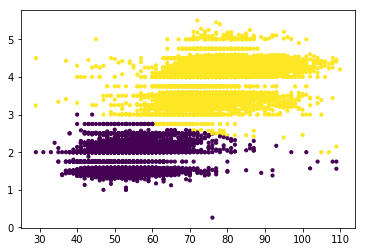

In [11]:
plt.scatter(data_ed.waiting_min, data_ed.dur, s=10, c=data_ed.labels)

In [12]:
# print the converged log-likelihood value 
print(gmm.lower_bound_) 

# print the number of iterations needed 
# for the log-likelihood value to converge 
print(gmm.n_iter_)



-4.645212979187799
4


In [13]:
print(gmm.means_)
print('\n')

print(gmm.covariances_)

[[52.84939481  1.8417806 ]
 [76.6350484   3.98147967]]


[[[60.74342259  0.22857026]
  [ 0.22857026  0.11087395]]

 [[76.48663531  1.26177758]
  [ 1.26177758  0.19621187]]]


### GMM, 1970-1992 data

In [2]:
d= pd.read_csv('early.csv', index_col='eruptionID')
d0 = d.dropna(how='any')
d0.count()

year           16232
waiting_min    16232
dur            16232
dtype: int64

In [3]:
d0.drop(['year'], inplace=True, axis=1, errors='ignore')

In [4]:
d1 = d0[['waiting_min', 'dur']]
d1.head()

,waiting_min,dur
eruptionID,,
23132,71.0,4.00
23133,50.0,1.50
23134,67.0,4.25
23135,81.0,4.00
23136,43.0,1.75


In [5]:
d2 = d1.loc[(d1['waiting_min'] <120) & (d1['dur'] < 8)]
early = d2.loc[(d2['waiting_min']) > 20]
early.count()

waiting_min    16093
dur            16093
dtype: int64

In [6]:
from sklearn.mixture import GaussianMixture 
import matplotlib.pyplot as plt 
# plot the data 
plt.scatter(early['waiting_min'], early['dur']) 

In [7]:
gmme = GaussianMixture(n_components = 2, covariance_type='full', random_state=43) 
  
# Fit the GMM model for the dataset  
# which expresses the dataset as a  
# mixture of 2 Gaussian Distribution 
gmme.fit(early) 
  
# Assign a label to each sample 
labels = gmme.predict(early) 
early['labels']= labels 
e0 = early[early['labels']== 0] 
e1 = early[early['labels']== 1] 
early.head()

C:\Users\Geopetal Energy\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,waiting_min,dur,labels
eruptionID,,,
23132,71.0,4.00,1
23133,50.0,1.50,0
23134,67.0,4.25,1
23135,81.0,4.00,1
23136,43.0,1.75,0


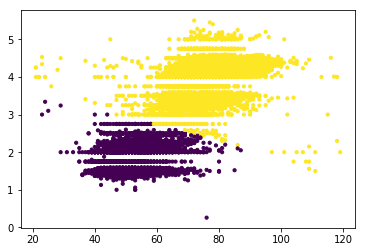

In [8]:
plt.scatter(early.waiting_min, early.dur, s=10, c=early.labels)

In [21]:
# print the converged log-likelihood value 
print(gmme.lower_bound_) 

# print the number of iterations needed 
# for the log-likelihood value to converge 
print(gmme.n_iter_)


-4.577672670666322
4


In [22]:
print(gmme.means_)
print('\n')

print(gmme.covariances_)

[[51.71911907  1.86327279]
 [75.08297127  3.9686862 ]]


[[[50.96225456  0.24231092]
  [ 0.24231092  0.10778268]]

 [[65.93873062  1.21009422]
  [ 1.21009422  0.20764745]]]


In [23]:
early.to_csv('early_GMM.csv', encoding='utf-8', index=True)

### GMM, 1992-2019 data

In [9]:
# Fit data
# Import data
trunc= pd.read_csv('truncated_late.csv', index_col='eruptionID')
truncl= trunc.dropna(how='any')
truncl.count()
#check for outliers
truncl.dur.max()

344.0

In [10]:
truncl.drop(['year'], inplace=True, axis=1, errors='ignore')

In [11]:
#truncate data to reasonable ranges
late1= truncl.loc[(truncl['waiting_min'] <120) & (truncl['dur'] <10)]
late= late1.loc[(truncl['waiting_min'] >= 40)]

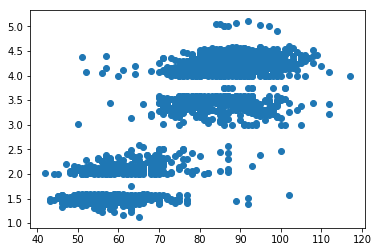

In [12]:
# plot the data 
plt.scatter(late['waiting_min'], late['dur']) 

In [13]:
gmml = GaussianMixture(n_components = 2, covariance_type='full', random_state=43)
  
# Fit the GMM model for the dataset  
# which expresses the dataset as a  
# mixture of 2 Gaussian Distribution 
gmml.fit(late) 
  
# Assign a label to each sample 
labels = gmml.predict(late) 
late['labels']= labels 
l0 = late[late['labels']== 0] 
l1 = late[late['labels']== 1] 
late.head()

C:\Users\Geopetal Energy\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,waiting_min,dur,labels
eruptionID,,,
1090262,84.0,3.51,0
1090263,80.0,4.16,0
1090264,71.0,4.11,0
1090265,89.0,4.00,0
1090266,55.0,2.30,1


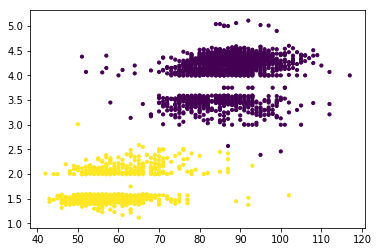

In [14]:
plt.scatter(late.waiting_min, late.dur, s=10, c=late.labels)

In [15]:
# print the converged log-likelihood value 
print(gmml.lower_bound_) 

# print the number of iterations needed 
# for the log-likelihood value to converge 
print(gmml.n_iter_)


-4.5031968655258785
4


In [16]:
print(gmml.means_)
print('\n')

print(gmml.covariances_)

[[86.69139633  4.03529324]
 [58.83940175  1.69951985]]


[[[60.13146947  0.60345013]
  [ 0.60345013  0.16387125]]

 [[58.76512033  0.78068256]
  [ 0.78068256  0.10092446]]]


In [58]:
late.head()

,waiting_min,dur,labels
eruptionID,,,
1090262,84.0,3.51,0
1090263,80.0,4.16,0
1090264,71.0,4.11,0
1090265,89.0,4.00,0
1090266,55.0,2.30,1


In [59]:

late.to_csv('GMM_late.csv', encoding='utf-8', index=True)

### Plotting GMM clustered data

In [22]:
# Dependencies and setup
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot 
from plotly.offline import plot

In [23]:
# Import data
earlier= pd.read_csv('early_GMM.csv', index_col='eruptionID')
earlier = earlier.dropna(how='any')
earlier.head()

,waiting_min,dur,labels
eruptionID,,,
23132,71.0,4.00,1
23133,50.0,1.50,0
23134,67.0,4.25,1
23135,81.0,4.00,1
23136,43.0,1.75,0


In [24]:
# Import data
later= pd.read_csv('GMM_Late.csv', index_col='eruptionID')
later = later.dropna(how='any')
later.head()

,waiting_min,dur,labels
eruptionID,,,
1090262,84.0,3.51,0
1090263,80.0,4.16,0
1090264,71.0,4.11,0
1090265,89.0,4.00,0
1090266,55.0,2.30,1


In [25]:
fig = go.Figure()


fig.add_trace(go.Scatter(
    x=earlier.waiting_min, y=earlier.dur,
    name='1970-1992',
    mode='markers',
    marker=dict(color=earlier['labels'], 
                colorscale=[[0, "yellow"], [1, "orange"]], opacity=0.75)
))


fig.add_trace(go.Scatter(
    x=later.waiting_min, y=later.dur,
    name='1992-2019',
    mode='markers',
    marker=dict(color=later['labels'], colorscale=[[0, "blue"], [1, "green"]], opacity=0.75)
))

# Set options common to all traces with fig.update_traces
fig.update_traces(mode='markers', marker_line_width=0.3, marker_size=9)
fig.update_layout(title='Waiting Time vs. Duration of Eruption Classified by Gaussian Mixture Model',
xaxis= dict(title= 'Waiting Time (minutes)', range=[0,140]),
yaxis= dict(title= 'Duration of Eruption (minutes)', range=[0,6]))


fig.show()

config = {'toImageButtonOptions':
          {'width': 900,
           'height': 550,
           'format': 'svg',
           'filename': 'chart7'}}

plot(fig, filename='chart7.html', config=config, show_link=False)


'chart7.html'